In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [4]:
bench_data = Table.read('bgbench.csv')
repeat = 1

In [5]:
mean = bench_data.group_by(['Image', 'Kernel', 'Implementation']).groups.aggregate(np.mean)

In [6]:
mean['Implementation'] = [i.split('<')[0] for i in mean['Implementation']]

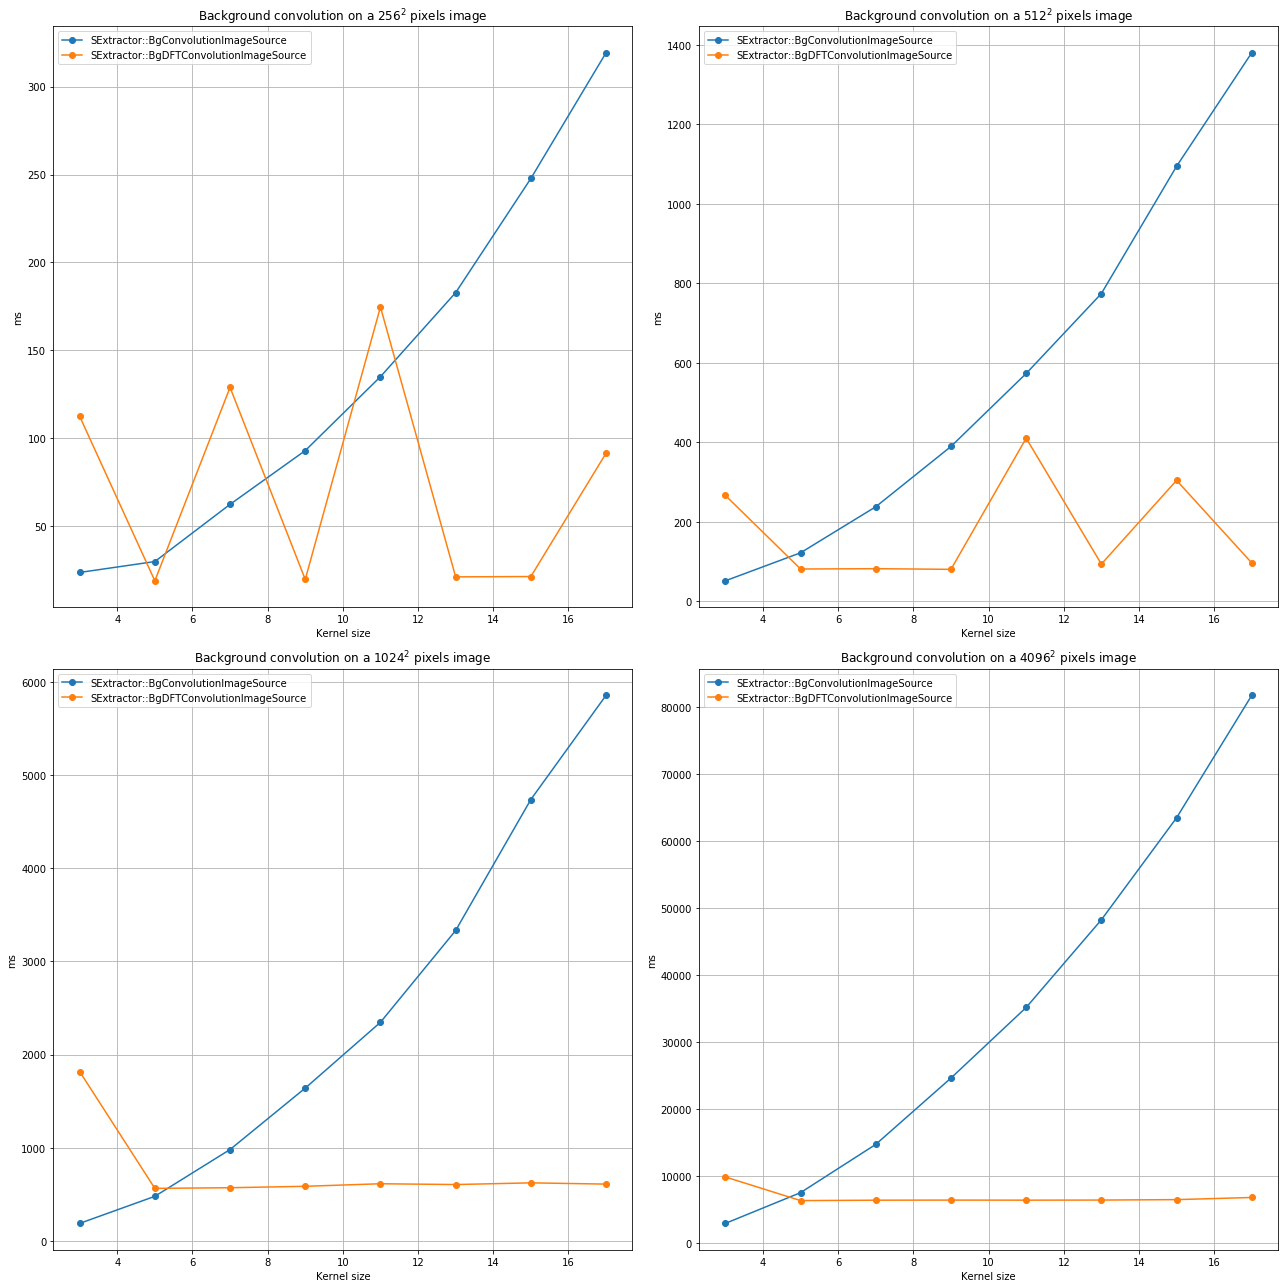

In [7]:
ref_img_sizes = [256, 512, 1024, 4096]
n_img_sizes = len(ref_img_sizes)
_, axs = plt.subplots(n_img_sizes//2, 2, figsize=(18, n_img_sizes//2 * 9))

for idx, size in enumerate(ref_img_sizes):
    i = idx // 2
    j = idx % 2
    for impl in np.unique(mean['Implementation']):
        krn_impl_subset = mean[np.logical_and(mean['Implementation'] == impl, mean['Image'] == size)]
        axs[i, j].plot(krn_impl_subset['Kernel'], krn_impl_subset['Time']/repeat/1e6, '-o', label=impl)
    
    axs[i, j].legend()
    axs[i, j].set_xlabel('Kernel size')
    axs[i, j].set_ylabel('ms')
    axs[i, j].grid(True)
    axs[i, j].set_title(f'Background convolution on a ${size}^2$ pixels image')

_ = plt.tight_layout()

In [8]:
f = np.logical_and(mean['Image'] == 4096, mean['Kernel'] ==11)
np.divide(*mean[f]['Time'])

5.528223006531133